<a href="https://colab.research.google.com/github/ewakobrzynska/MachineLearning/blob/main/025_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

In [29]:
import numpy as np
from sklearn.linear_model import Ridge

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15, 1)

x = np.c_[np.ones((15, 1)), x]

I = np.identity(2)
alphas = [0.0, 0.1, 0.5, 1.0] # change here

# add 1-3 line of code here
results = []
for alpha in alphas:
    w = np.linalg.inv(x.T.dot(x) + alpha * I).dot(x.T).dot(y)
    w = w.ravel()

# add 1-3 lines to compare the results
    ridge = Ridge(alpha=alpha, fit_intercept=False).fit(X=x, y=y)
    print(f"Alpha: {alpha}\n"
          f"w0 scratch: {w.item(0)}\n"
          f"w1 scratch: {w.item(1)}\n"
          f"w0 sklearn: {ridge.coef_.item(0)}\n"
          f"w1 sklearn: {ridge.coef_.item(1)}\n")

Alpha: 0.0
w0 scratch: -180.92401771633644
w1 scratch: 1.6181424688789636
w0 sklearn: -180.92401771633473
w1 sklearn: 1.6181424688789574

Alpha: 0.1
w0 scratch: -101.72397080681458
w1 scratch: 1.169787574869769
w0 sklearn: -101.72397080681503
w1 sklearn: 1.169787574869778

Alpha: 0.5
w0 scratch: -36.97522015716443
w1 scratch: 0.8032416872615309
w0 sklearn: -36.975220157164365
w1 sklearn: 0.803241687261533

Alpha: 1.0
w0 scratch: -20.590447055498615
w1 scratch: 0.7104861640228317
w0 sklearn: -20.590447055498615
w1 sklearn: 0.7104861640228313



## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results.

In [44]:
def soft_threshold(x, alpha):
    return np.sign(x) * np.maximum(np.abs(x) - alpha, 0)

def sgd(x, y, alpha, epochs=10, learning_rate=0.01):
    n_samples, n_features = x.shape
    w = np.zeros((n_features, 1))  # Initialize weights to zeros
    for _ in range(epochs):
        for i in range(n_samples):
            x_i = x[i, :].reshape(1, -1)
            y_i = y[i]
            error = y_i - np.dot(x_i, w)
            # Compute the gradient of the Lasso loss function with regularization
            grad = -2 * x_i.T.dot(error)
            # Update weights with soft thresholding
            w -= learning_rate * grad
            w = soft_threshold(w, alpha * learning_rate)
    return w.ravel()

In [45]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1)

x_normalized = (x - x.mean(axis=0)) / x.std(axis=0)
x_normalized = np.c_[np.ones((15, 1)), x_normalized]

alpha = 0.1

# Sklearn Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=alpha, fit_intercept=False).fit(X=x_normalized, y=y)
print("Sklearn intercept:", lasso.intercept_, "coef:", lasso.coef_)

# SGD for different epochs
epochs_list = [10, 1000, 5000, 10000]
for epochs in epochs_list:
    w_sgd = sgd(x_normalized, y, alpha, epochs=epochs)
    print(f"SGD {epochs} epoch intercept:", w_sgd[0], "coef:", w_sgd[1])

Sklearn intercept: 0.0 coef: [102.36666667  26.23725365]
SGD 10 epoch intercept: 98.08558604527279 coef: 24.054409131489134
SGD 1000 epoch intercept: 102.92109050328455 coef: 25.360905534084104
SGD 5000 epoch intercept: 102.92109050328455 coef: 25.360905534084104
SGD 10000 epoch intercept: 102.92109050328455 coef: 25.360905534084104


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

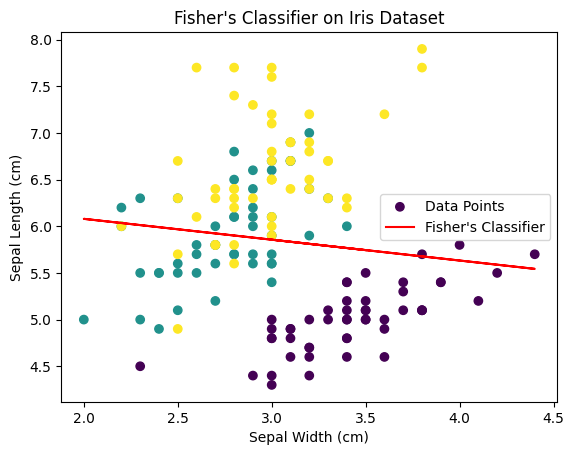

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target  # Add target column

x = iris_df['sepal width (cm)'].values
y = iris_df['sepal length (cm)'].values
target = iris_df['target'].values

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

y_pred = a * x + b

# Plotting the data points and the classifier line
plt.scatter(x, y, c=target, cmap='viridis', label='Data Points')
plt.plot(x, y_pred, color='red', label='Fisher\'s Classifier')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.title('Fisher\'s Classifier on Iris Dataset')
plt.legend()
plt.show()
